In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
lab_mice = "../Downloads/mouse_drug_data.csv"
clinical_trial_results = "../Downloads/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
test_mice = pd.read_csv(lab_mice)
clinical_test = pd.read_csv(clinical_trial_results)
# Combine the data into a single dataset
combined_tests=pd.merge(clinical_test, test_mice, on="Mouse ID")

# Display the data table for preview
combined_tests.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume=combined_tests.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_mean = pd.DataFrame({"Tumor Volume (mm3)": mean_tumor_volume })
# Preview DataFrame
tumor_mean.reset_index()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_tumor_volume=combined_tests.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_error = pd.DataFrame({"Tumor Volume (mm3)": error_tumor_volume })
# Preview DataFrame
tumor_error.reset_index().head(5)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
one = combined_tests[combined_tests["Drug"]=="Capomulin"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
two = combined_tests[combined_tests["Drug"]=="Ceftamin"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
three = combined_tests[combined_tests["Drug"]=="Infubinol"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
four = combined_tests[combined_tests["Drug"]=="Ketapril"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
five = combined_tests[combined_tests["Drug"]=="Naftisol"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
six = combined_tests[combined_tests["Drug"]=="Placebo"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
seven= combined_tests[combined_tests["Drug"]=="Propriva"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
eight = combined_tests[combined_tests["Drug"]=="Ramicane"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
nine = combined_tests[combined_tests["Drug"]=="Stelasyn"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]
ten = combined_tests[combined_tests["Drug"]=="Zoniferol"].groupby(["Timepoint"]).mean()["Tumor Volume (mm3)"]

# Preview that Reformatting worked
summary_drugs=pd.DataFrame({"Capomulin": one,"Ceftamin":two,"Infubinol":three,"Ketapril":four,"Naftisol":five,
                           "Placebo":six,"Propriva":seven,"Ramicane":eight,"Stelasyn":nine,"Zoniferol":ten})
summary_drugs.columns.names = ["Drug"]
summary_drugs.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


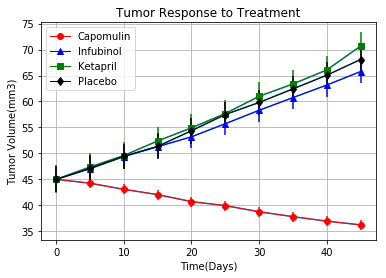

In [5]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)
c=summary_drugs["Capomulin"].sem()
I=summary_drugs["Infubinol"].sem()
k=summary_drugs["Ketapril"].sem()
p=summary_drugs["Placebo"].sem()
Capomulin, = plt.plot(x_axis, summary_drugs["Capomulin"], marker="o", color="Red", linewidth=1, label="Capomulin")
Infubinol,= plt.plot(x_axis, summary_drugs["Infubinol"], marker="^", color="Blue", linewidth=1, label="Infubinol")
Ketapril, = plt.plot(x_axis, summary_drugs["Ketapril"], marker="s", color="Green", linewidth=1, label="Ketapril")
Placebo,= plt.plot(x_axis, summary_drugs["Placebo"], marker="d", color="Black", linewidth=1, label="Placebo")  
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.errorbar(x_axis,summary_drugs["Capomulin"], yerr=c, barsabove="true", ecolor="red")
plt.errorbar(x_axis,summary_drugs["Infubinol"], yerr=I, barsabove="true", ecolor="blue")
plt.errorbar(x_axis,summary_drugs["Ketapril"], yerr=k, barsabove="true", ecolor="green")
plt.errorbar(x_axis,summary_drugs["Placebo"], yerr=p, barsabove="true", ecolor="black")
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.grid()
# Save the Figure
plt.savefig("../Downloads/Tumour_response.png")


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site=combined_tests.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
met_mean = pd.DataFrame({"Metastatic Sites":mean_met_site})
# Preview DataFrame
met_mean.reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
error_met_site=combined_tests.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_error = pd.DataFrame({"Metastatic Sites":error_met_site})
# Preview DataFrame
error_met_site.reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [8]:
# Minor Data Munging to Re-Format the Data Frames
cap = combined_tests[combined_tests["Drug"]=="Capomulin"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
ceft = combined_tests[combined_tests["Drug"]=="Ceftamin"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
inf = combined_tests[combined_tests["Drug"]=="Infubinol"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
keta= combined_tests[combined_tests["Drug"]=="Ketapril"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
naft = combined_tests[combined_tests["Drug"]=="Naftisol"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
plac = combined_tests[combined_tests["Drug"]=="Placebo"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
prop= combined_tests[combined_tests["Drug"]=="Propriva"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
rami = combined_tests[combined_tests["Drug"]=="Ramicane"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
stel = combined_tests[combined_tests["Drug"]=="Stelasyn"].groupby(["Timepoint"]).mean()["Metastatic Sites"]
zoni = combined_tests[combined_tests["Drug"]=="Zoniferol"].groupby(["Timepoint"]).mean()["Metastatic Sites"]

# Preview that Reformatting worked
summary_meta=pd.DataFrame({"Capomulin": cap,"Ceftamin":ceft,"Infubinol":inf,"Ketapril":keta,"Naftisol":naft,
                           "Placebo":plac,"Propriva":prop,"Ramicane":rami,"Stelasyn":stel,"Zoniferol":zoni})
summary_meta.columns.names = ["Drug"]
summary_meta.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


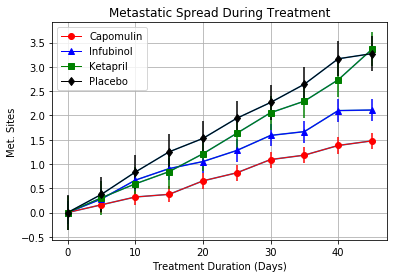

In [9]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0,50,5)
ca=summary_meta["Capomulin"].sem()
In=summary_meta["Infubinol"].sem()
ke=summary_meta["Ketapril"].sem()
pl=summary_meta["Placebo"].sem()
Capomu, = plt.plot(x_axis, summary_meta["Capomulin"], marker="o", color="Red", linewidth=1, label="Capomulin")
Infubi,= plt.plot(x_axis, summary_meta["Infubinol"], marker="^", color="Blue", linewidth=1, label="Infubinol")
Ketapr, = plt.plot(x_axis, summary_meta["Ketapril"], marker="s", color="Green", linewidth=1, label="Ketapril")
Placeb,= plt.plot(x_axis, summary_meta["Placebo"], marker="d", color="Black", linewidth=1, label="Placebo")  
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.errorbar(x_axis,summary_meta["Capomulin"], yerr=ca, barsabove="true", ecolor="red")
plt.errorbar(x_axis,summary_meta["Infubinol"], yerr=In, barsabove="true", ecolor="blue")
plt.errorbar(x_axis,summary_meta["Ketapril"], yerr=ke, barsabove="true", ecolor="green")
plt.errorbar(x_axis,summary_meta["Placebo"], yerr=pl, barsabove="true", ecolor="black")
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.grid()

# Save the Figure
plt.savefig("../Downloads/Metastatic_response.png")
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_groups=combined_tests.groupby(["Drug","Timepoint"]).size()

# Convert to DataFrame
mouse_count = pd.DataFrame({"Mouse Count":mouse_groups})
# Preview DataFrame
mouse_count.reset_index().head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
ca = combined_tests[combined_tests["Drug"]=="Capomulin"].groupby(["Timepoint"]).size()
ce = combined_tests[combined_tests["Drug"]=="Ceftamin"].groupby(["Timepoint"]).size()
inb = combined_tests[combined_tests["Drug"]=="Infubinol"].groupby(["Timepoint"]).size()
ket= combined_tests[combined_tests["Drug"]=="Ketapril"].groupby(["Timepoint"]).size()
naf = combined_tests[combined_tests["Drug"]=="Naftisol"].groupby(["Timepoint"]).size()
pla = combined_tests[combined_tests["Drug"]=="Placebo"].groupby(["Timepoint"]).size()
pro= combined_tests[combined_tests["Drug"]=="Propriva"].groupby(["Timepoint"]).size()
ram = combined_tests[combined_tests["Drug"]=="Ramicane"].groupby(["Timepoint"]).size()
ste = combined_tests[combined_tests["Drug"]=="Stelasyn"].groupby(["Timepoint"]).size()
zon = combined_tests[combined_tests["Drug"]=="Zoniferol"].groupby(["Timepoint"]).size()


# Preview the Data Frame
summary_mouse=pd.DataFrame({"Capomulin": ca,"Ceftamin":ce,"Infubinol":inb,"Ketapril":ket,"Naftisol":naf,
                           "Placebo":pla,"Propriva":pro,"Ramicane":ram,"Stelasyn":ste,"Zoniferol":zon})
summary_mouse.columns.names = ["Drug"]
summary_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


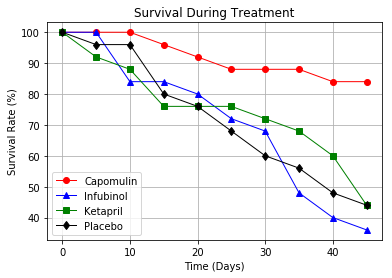

In [12]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0,50,5)
Capom, = plt.plot(x_axis, summary_mouse["Capomulin"]/25*100, marker="o", color="Red", linewidth=1, label="Capomulin")
Infub,= plt.plot(x_axis, summary_mouse["Infubinol"]/25*100, marker="^", color="Blue", linewidth=1, label="Infubinol")
Ketap, = plt.plot(x_axis, summary_mouse["Ketapril"]/25*100, marker="s", color="Green", linewidth=1, label="Ketapril")
Place,= plt.plot(x_axis, summary_mouse["Placebo"]/25*100, marker="d", color="Black", linewidth=1, label="Placebo")  
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.grid()
# Save the Figure
plt.savefig("../Downloads/Survival_rates.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percentage_change = (summary_drugs.loc[45, :] - summary_drugs.loc[0, :])/summary_drugs.loc[0, :] * 100
# Display the data to confirm
percentage_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

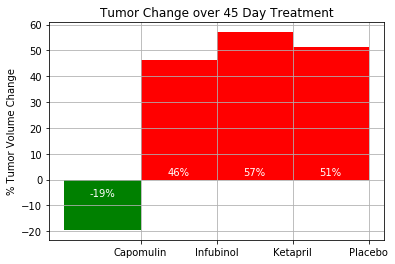

In [14]:
# Store all Relevant Percent Changes into a Tuple
drugss=['Capomulin','Infubinol','Ketapril','Placebo']
percents= [(percentage_change[drug])for drug in drugss]
# Splice the data between passing and failing drugs

drug_pass=percentage_change<0
         
# Orient widths. Add labels, tick marks, etc. 
reacts1=plt.bar(drugss,percents,width=-1,align='edge',color=drug_pass.map({True:'g',False:'r'}))
tick_locations = [value for value in drugss]
plt.xticks(tick_locations, drugss)
plt.grid()
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')


# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height>0:
            label=1
        else:
            label=-7
        plt.text(rect.get_x()+rect.get_width()/2., label, '%d'%int(height) +'%',
                ha='center', va='bottom',color="white")


# Call functions to implement the function calls
autolabel(reacts1)
# Save the Figure
plt.savefig("../Downloads/Percent_change.png")
# Show the Figure
plt.show()